# Bank of England Sentiment Analysis
## Employer Project
### Team 8 AnalytIQ, June 2nd, 2025
**Team Members**: Lalitha Vemuri, Christina Tsoulfa, Reka Bodo, Yann Hirsig, Louis Pang, Dr. Karin Agius Ferrante

## Content
1. Approach
2. Load the Data
3. Exploratory Sentiment Analysis for full data set
4. Exploratory Sentiment Analysis for BoE Speeches only
5. Exploratory Analysis for Correlation with Economic Indicators
6. Insights & Recommendations

## 1. Approach

The **Bank of England (BoE)**, the UK’s central bank and one of the world’s leading financial institutions, plays a pivotal role in maintaining economic and financial stability, and supporting the UK government’s economic policies. One of its key communication channels with the public and markets is through formal speeches delivered by its representatives. These speeches aim to offer guidance, manage expectations, and provide clarity in times of uncertainty.

However, the effectiveness and impact of these speeches on economic indicators and market behaviour are not fully understood. 

This project seeks to explore whether the sentiment and timing of BoE speeches hold analytical or predictive value, when compared with economic performance and key events.

### Main Business Questions
**Has the tone or sentiment of the BoE’s speeches evolved over time? If so, how?**<br>
**How do sentiments align with events like interest rate changes, policy reports, or major economic releases?**

**Sub-questions**

1.	Are there measurable correlations between speech sentiment and UK economic indicators such as inflation, GDP, employment rates and bond yields?
2. Does the change in sentiment change economic indicators or is the speech sentiment reactive to economic indicators?
3. Can speech sentiment trends be used to predict market reactions or economic outcomes?
4. What broader insights can be drawn to support data-informed communication strategies?

## 2. Load the Data

- All speeches CSV file (all_speeches.csv)
- Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

### 2.1. Import libraries

In [11]:
# Import relevant libraries.
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [12]:
!pip install contractions
!pip install nltk

In [13]:
# Text and Sentiment Analysis 
from wordcloud import WordCloud                                       # Generating visual word frequency clouds from text.
import nltk                                                           # Natural language processing tasks.
from nltk import word_tokenize, pos_tag                               # Splitting text into words and tags with part of speech
from nltk import defaultdict                                          # Providing default values for nonexistent keys.
from nltk.probability import FreqDist                                 # Calculating frequency distribution of tokens.
from nltk.corpus import stopwords                                     # Providing list of common words to exclude from analysis.
from nltk.corpus import words
from nltk.corpus import wordnet as wn                                 # Lexical database for retrieving word relationships & meanings.
from nltk.stem import WordNetLemmatizer, PorterStemmer                # Reducing words to base or root form.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Assessing sentiment intensity in text.
from textblob import TextBlob                                         # API for text processing tasks including sentiment analysis.
import contractions                                                   # Expanding/contracting text contractions.
import re                                                             # Regular expression operations on strings.
from collections import defaultdict  # Creating dictionaries that return default value for nonexistent keys.
from collections import Counter  # Importing Counter for counting hashable objects and efficiently tallying occurrences in an iterable.

for pkg in ["punkt", "stopwords", "vader_lexicon"]:
    nltk.download(pkg, quiet=True)

stop_words = set(stopwords.words('english'))

# Ensure required NLTK resources are present (quiet=True => no console spam)
for pkg in [
    "punkt",
    "stopwords",
    "vader_lexicon",
]:
    nltk.download(pkg, quiet=True)

import warnings
warnings.filterwarnings("ignore")

### 2.2. Import the data

In [15]:
# Import necessary libraries
import pandas as pd
from IPython.display import display

def load_data(**paths):
    """
    Load multiple datasets based on provided file paths.

    Parameters:
    **paths: Arbitrary number of keyword arguments where the key is a label 
             and the value is the file path.

    Returns:
    dict: A dictionary where keys are the labels and values are the corresponding pandas DataFrames.
    """
    dataframes = {}

    for name, path in paths.items():
        if path.endswith('.csv'):
            df = pd.read_csv(path)
        elif path.endswith(('.xls', '.xlsx')):
            df = pd.read_excel(path)
        else:
            raise ValueError(f"Unsupported file format for '{name}': {path}")
        
        display(df.head())
        dataframes[name] = df

    return dataframes

# Paths to your files
# speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
# sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# speeches_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/all_speeches.csv"
# sentiment_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx"

# speeches_path = r"/Users/christinetsoulfa/Desktop/LSE_Data Analytics/Work Project/Files/all_speeches.csv"
# sentiment_path = r"/Users/christinetsoulfa/Desktop/LSE_Data Analytics/Work Project/Files/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx"

speeches_path = r"/Users/rebo/Documents/LSE/Course 4 - EP/Initial datasets/all_speeches.csv"
sentiment_path = r"/Users/rebo/Documents/LSE/Course 4 - EP/Initial datasets/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx"

# Load data
data = load_data(speeches=speeches_path, sentiment=sentiment_path)

speeches_df_org = data['speeches']
sentiment_df_org = data['sentiment']

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


### 2.3. Explore and Clean Data

### Approach
- Check the data sets and dates
- Are dates parsed properly?
- Are speech texts clean (no missing)?
- Is the sentiment list organized (positive/negative words tagged)?

**2.3.a. Review Datasets**
- Look for missing values, review basic statistics & check data types
- Look at the structure of the speeches and sentiment files

In [18]:
def explore_data(speeches_df_org: pd.DataFrame, sentiment_df_org: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df_org.info())
    display(speeches_df_org.describe())
    display(speeches_df_org.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df_org.info())
    display(sentiment_df_org.describe())
    display(sentiment_df_org.isnull().sum())

# Run exploration
explore_data(speeches_df_org, sentiment_df_org)


--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

,is_gov
count,7721.000000
mean,0.347235
std,0.476122
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

In [19]:
# Data Validation
print("\nData types:")
print(speeches_df_org.dtypes)

print("\nMissing values per column:")
print(speeches_df_org.isnull().sum())


Data types:
reference    object
country      object
date         object
title        object
author       object
is_gov        int64
text         object
dtype: object

Missing values per column:
reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


**2.3.b. Ensure dates are in the correct format**<br>
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

In [21]:
def clean_dates(speeches_df_org: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df_org['date'] = pd.to_datetime(speeches_df_org['date'], errors='coerce')
    display(speeches_df_org.head())
    return speeches_df_org

# Clean date columns
speeches_df_org = clean_dates(speeches_df_org)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [22]:
# Data Validation
print("\nData types:")
print(speeches_df_org.dtypes)


Data types:
reference            object
country              object
date         datetime64[ns]
title                object
author               object
is_gov                int64
text                 object
dtype: object


In [23]:
# Add a new column for year and month.
speeches_df_org['year_month'] = pd.to_datetime(speeches_df_org.date).dt.strftime('%Y-%m')

# Add a new column for year only.
speeches_df_org['year'] = pd.to_datetime(speeches_df_org.date).dt.year

# Add a new column for month only.
speeches_df_org['month'] = pd.to_datetime(speeches_df_org.date).dt.month

# View the DataFrame.
speeches_df_org.head()

,reference,country,date,title,author,is_gov,text,year_month,year,month
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,1990-11,1990,11
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1991-10,1991,10
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,1992-03,1992,3
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1992-05,1992,5
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1992-08,1992,8


In [24]:
# Identify speech length.    
speeches_df_org['speech_length'] = speeches_df_org['text'].str.split().apply(len)

# View the DataFrame.
speeches_df_org.head()

,reference,country,date,title,author,is_gov,text,year_month,year,month,speech_length
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,1990-11,1990,11,3627
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1991-10,1991,10,3054
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,1992-03,1992,3,3399
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1992-05,1992,5,3841
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1992-08,1992,8,4152


**ADDITIONAL**

Revew parameters unique values and some basic exploration

In [26]:
# Review unique values of each key parameter
def list_unique_values(df, *columns):
    """
    Prints the unique values for specified columns in a DataFrame.
    
    Parameters:
    speeches_df_org (DataFrame): Central bank speeches.
    columns: list of column names to inspect
    """
    for col in columns:
        if col in df.columns:
            unique_vals = df[col].unique()
            print(f"\nColumn '{col}' has {len(unique_vals)} unique value(s):")
            print(unique_vals)
        else:
            print(f"\nColumn '{col}' not found in DataFrame.")

list_unique_values(speeches_df_org, 'country', 'author', 'year')


Column 'country' has 8 unique value(s):
['australia' 'canada' 'euro area' 'japan' 'sweden' 'switzerland'
 'united kingdom' 'united states']

Column 'author' has 325 unique value(s):
['fraser' 'macfarlane' 'lowe' 'stevens' 'no_info' 'ac' 'thiessen' 'bonin'
 'dodge' 'jenkins' 'kennedy' 'macklem' 'duguay' 'longworth' 'carney'
 'murray' 'lane' 'wolf' 'boivin' 'cote' 'poloz' 'schembri' 'johnson'
 'wilkins' 'chilcott' 'mendes' 'patterson' 'murchison' 'leduc' 'dinis'
 'beaudry' 'gravelle' 'kozicki' 'rogers' 'morrow' 'lamfalussy'
 'duisenberg' 'vienna' 'london' 'tokyo' 'kong' 'bank' 'schioppa'
 'hamalainen' 'main' 'noyer' 'committee' 'solans' 'francisco' 'istanbul'
 'issing' 'hoogduin' 'bankwashington' 'efma' 'brussels' 'forum' 'workshop'
 'quiros' 'papademos' 'gugerell' 'trichet' 'network' 'delivered' 'paramo'
 'strasbourg' 'rome' 'berlin' 'smaghi' 'sevilla' 'madrid' 'stark'
 'singapore' 'summit' 'washington' 'aires' 'bratislava' 'ecb' 'constancio'
 'posen' 'praet' 'draghi' 'coeure' 'asmusse

In [27]:
# Check the date frame of the dataset
def get_year_month_range(df):
    """
    Returns the min and max values of the 'year_month' column.
    Assumes 'year_month' is in YYYY-MM format.
    """
    if 'year_month' not in df.columns:
        raise ValueError("Column 'year_month' not found in DataFrame.")
    
    min_ym = df['year_month'].min()
    max_ym = df['year_month'].max()
    
    print(f"Year-Month range: {min_ym} to {max_ym}")
    return min_ym, max_ym

# Run for speech year_month:
get_year_month_range(speeches_df_org)

Year-Month range: 1900-01 to 2022-11


('1900-01', '2022-11')

## 3. Exploratory Sentiment Analysis of full dataset

### Next steps:

Preprocess text a little (basic cleaning).

Apply sentiment scoring using your wordlist.

Start time series sentiment analysis.

We need to:

Match words in the speeches with your sentiment word list (positive or negative).

Calculate a simple Sentiment Score for each speech.

### 3.1. Text Cleaning
Clean the text a little (lowercase, remove symbols if needed).

In [33]:
# Create copy of the dataframe for data cleaning and exploration.
speeches_df = speeches_df_org.copy()
sentiment_df = sentiment_df_org.copy()

In [34]:
# Check columns in speeches dataset
print(speeches_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'year_month', 'year', 'month', 'speech_length'],
      dtype='object')


**3.1.a. Correct a mistake**:
- Edward George was Governor from 1993 to 2003.
- In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

**A quick summary of the cleaning process**:
- We first convert date to datetime, just in case it isn't yet.
- .str.lower() ensures case-insensitive matching ("George", "george", etc.).
- .loc[condition, 'is_gov'] = 1 assigns Governor status (YES).
- Then we display some George rows to verify!
- After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.

In [37]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())

,reference,country,date,title,author,is_gov,text,year_month,year,month,speech_length
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,1,"Thank you, Chairman. I'm actually very pleased...",1998-09,1998,9,2387
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,1,It's a great pleasure to be here in the beauti...,1998-10,1998,10,4045
4966,r981119a_BOE,united kingdom,1998-11-19,Speech,george,1,Let me put some of the recent newspaper headli...,1998-11,1998,11,2363
4969,r990112a_BOE,united kingdom,1999-01-12,Speech,george,1,I am only too well aware of the pressure curre...,1999-01,1999,1,2550
4970,r990118a_BOE,united kingdom,1999-01-18,Speech,george,1,It would be a masterly understatement to descr...,1999-01,1999,1,2434


**3.1.b Full text cleaning**

In [39]:
# Check what columns exist in your speeches dataframe
print(speeches_df.columns.tolist())

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'year_month', 'year', 'month', 'speech_length']


In [40]:
# Check what columns exist in your sentiment dataframe
print(sentiment_df.columns.tolist())

['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


In [41]:
# Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text


In [42]:
# Clean the text column
# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# View the dataframe.
speeches_df.head()

,reference,country,date,title,author,is_gov,text,year_month,year,month,speech_length,cleaned_text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,1990-11,1990,11,3627,they would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,1991-10,1991,10,3054,today i wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,1992-03,1992,3,3399,i welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,1992-05,1992,5,3841,it is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",1992-08,1992,8,4152,as a longtime fan of don sanders i am delighte...


In [43]:
# Test output UK speeches
# Filter speeches where country is 'united kingdom'
uk_speeches_df = speeches_df[speeches_df['country'].str.lower() == 'united kingdom']

# Select the desired columns
columns_to_save = ['reference','country', 'author','is_gov', 'title', 'year','month', 'speech_length', 'cleaned_text']
selected_df = uk_speeches_df[columns_to_save]

# Save to Excel
selected_df.to_excel('selected_UK_speeches.xlsx', index=False)

In [44]:
# Import MPC data and prepare for further segmenting speeches
mpc_path = r"/Users/rebo/Documents/LSE/Course 4 - EP/Initial datasets/mpcvoting.xlsx"

data = load_data( mpc=mpc_path)

mpc_df_og = data['mpc']

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,NaN,NaN,NaN,Monetary Policy Committee voting history - Ban...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Current members,Andrew Bailey,Sarah Breeden,Swati Dhingra,Megan Greene,Clare Lombardelli,Catherine L Mann,Huw Pill,...,Michael\nSaunders,Andrew Sentance,Nemat Shafik,Silvana Tenreyro,Paul Tucker,John Vickers,Gertjan\nVlieghe,Sushil Wadhwani,David Walton,Martin Weale
3,NaN,NaN,NaN,First vote:\n19 Mar 20,First vote:\n2 Nov 23,First vote:\n22 Sep 22,First vote:\n3 Aug 23,First vote:\n1 Aug 24,First vote:\n23 Sep 21,First vote:\n23 Sep 21,...,Last vote:\n4 Aug 22,Last vote:\n5 May 11,Last vote:\n2 Feb 17,Last vote:\n22 June 23,Last vote:\n9 Oct 13,Last vote:\n7 Sep 00,Last vote:\n5 Aug 21,Last vote:\n9 May 02,Last vote:\n8 Jun 06,Last vote:\n4 Aug 16
4,NaN,Voted to increase,NaN,14,0,2,4,0,18,14,...,15,20,0,9,13,10,2,3,2,12


In [45]:
# Build memebers and status dataset
# Get the row with names
row = mpc_df_og.iloc[2]

# Convert to Series to ensure we treat it like a 1D array
row_series = pd.Series(row)

# Find positions (not labels) of the marker columns
current_pos = row_series[row_series == "Current members"].index[0]
past_pos = row_series[row_series == "Past members"].index[0]

# Convert to actual positions
current_idx = row_series.index.get_loc(current_pos)
past_idx = row_series.index.get_loc(past_pos)

# Get names by position
current_members = row_series.iloc[current_idx + 1 : past_idx].dropna().tolist()
past_members = row_series.iloc[past_idx + 1 :].dropna().tolist()

# Build the dataset
member_data = pd.DataFrame({
    "name": current_members + past_members,
    "status": ["current"] * len(current_members) + ["past"] * len(past_members)
})

display(member_data)

,name,status
0,Andrew Bailey,current
1,Sarah Breeden,current
2,Swati Dhingra,current
3,Megan Greene,current
4,Clare Lombardelli,current
5,Catherine L Mann,current
6,Huw Pill,current
7,Dave Ramsden,current
8,Alan Taylor,current
9,Christopher Allsopp,past


In [46]:
# Since speech data has only family names of authors, I'll clean the names
def split_name(name):
    # Fix line breaks first -> noticed some names are separated with "\n" instead of space
    name = name.replace("\n", " ").strip().lower()

    # Split into parts
    parts = name.split()

    if len(parts) < 2:
        # If it’s a single name, duplicate it for safety -> if any
        return name, name

    # Assume last part is family name, rest is given name
    given_name = " ".join(parts[:-1])
    family_name = parts[-1]

    return given_name, family_name

# Apply the function to the name column
member_data[['given_name', 'family_name']] = member_data['name'].apply(
    lambda x: pd.Series(split_name(x))
)

display(member_data)

,name,status,given_name,family_name
0,Andrew Bailey,current,andrew,bailey
1,Sarah Breeden,current,sarah,breeden
2,Swati Dhingra,current,swati,dhingra
3,Megan Greene,current,megan,greene
4,Clare Lombardelli,current,clare,lombardelli
5,Catherine L Mann,current,catherine l,mann
6,Huw Pill,current,huw,pill
7,Dave Ramsden,current,dave,ramsden
8,Alan Taylor,current,alan,taylor
9,Christopher Allsopp,past,christopher,allsopp


In [47]:
mpc_df_og.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,NaN,NaN,NaN,Monetary Policy Committee voting history - Ban...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Current members,Andrew Bailey,Sarah Breeden,Swati Dhingra,Megan Greene,Clare Lombardelli,Catherine L Mann,Huw Pill,...,Michael\nSaunders,Andrew Sentance,Nemat Shafik,Silvana Tenreyro,Paul Tucker,John Vickers,Gertjan\nVlieghe,Sushil Wadhwani,David Walton,Martin Weale
3,NaN,NaN,NaN,First vote:\n19 Mar 20,First vote:\n2 Nov 23,First vote:\n22 Sep 22,First vote:\n3 Aug 23,First vote:\n1 Aug 24,First vote:\n23 Sep 21,First vote:\n23 Sep 21,...,Last vote:\n4 Aug 22,Last vote:\n5 May 11,Last vote:\n2 Feb 17,Last vote:\n22 June 23,Last vote:\n9 Oct 13,Last vote:\n7 Sep 00,Last vote:\n5 Aug 21,Last vote:\n9 May 02,Last vote:\n8 Jun 06,Last vote:\n4 Aug 16
4,NaN,Voted to increase,NaN,14,0,2,4,0,18,14,...,15,20,0,9,13,10,2,3,2,12
5,NaN,Voted to maintain,NaN,24,9,9,8,3,10,13,...,30,28,28,39,114,11,48,18,8,60
6,NaN,Voted to reduce,NaN,4,3,10,2,3,1,2,...,5,8,1,2,10,7,4,16,2,1
7,NaN,Meetings,NaN,42,12,21,14,6,29,29,...,50,56,29,50,137,28,54,37,12,73
8,NaN,NaN,Bank Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Take a slightly different route - handle the data altogether and clean
# Drop the first column and the first 2 rows
mpc_df_og_cleaned = mpc_df_og.drop(columns=mpc_df_og.columns[0]).drop(index=range(2)).reset_index(drop=True)

mpc_df_og_cleaned.head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,NaN,Current members,Andrew Bailey,Sarah Breeden,Swati Dhingra,Megan Greene,Clare Lombardelli,Catherine L Mann,Huw Pill,Dave Ramsden,...,Michael\nSaunders,Andrew Sentance,Nemat Shafik,Silvana Tenreyro,Paul Tucker,John Vickers,Gertjan\nVlieghe,Sushil Wadhwani,David Walton,Martin Weale
1,NaN,NaN,First vote:\n19 Mar 20,First vote:\n2 Nov 23,First vote:\n22 Sep 22,First vote:\n3 Aug 23,First vote:\n1 Aug 24,First vote:\n23 Sep 21,First vote:\n23 Sep 21,First vote:\n14 Sep 17,...,Last vote:\n4 Aug 22,Last vote:\n5 May 11,Last vote:\n2 Feb 17,Last vote:\n22 June 23,Last vote:\n9 Oct 13,Last vote:\n7 Sep 00,Last vote:\n5 Aug 21,Last vote:\n9 May 02,Last vote:\n8 Jun 06,Last vote:\n4 Aug 16
2,Voted to increase,NaN,14,0,2,4,0,18,14,16,...,15,20,0,9,13,10,2,3,2,12
3,Voted to maintain,NaN,24,9,9,8,3,10,13,39,...,30,28,28,39,114,11,48,18,8,60
4,Voted to reduce,NaN,4,3,10,2,3,1,2,8,...,5,8,1,2,10,7,4,16,2,1
5,Meetings,NaN,42,12,21,14,6,29,29,63,...,50,56,29,50,137,28,54,37,12,73
6,NaN,Bank Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1997-06-06 00:00:00,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1997-07-10 00:00:00,0.0675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Split the information in row [1] to date and its label
row_1 = mpc_df_og_cleaned.iloc[1]

# Split each cell on '\n' into two pieces
split_rows = row_1.apply(lambda x: x.split('\n') if isinstance(x, str) and '\n' in x else [x, None])

# Create two new rows: labels and dates
labels_row = split_rows.apply(lambda x: x[0])
dates_row = split_rows.apply(lambda x: x[1])

# Replace original row 1 with the label row
mpc_df_og_cleaned.iloc[1] = labels_row

# Insert the date row as a new row after row 1 (i.e., at index 2)
mpc_df_og_cleaned = pd.concat([
    mpc_df_og_cleaned.iloc[:2],          # rows before insert point
    pd.DataFrame([dates_row]),           # new date row
    mpc_df_og_cleaned.iloc[2:].reset_index(drop=True)  # remaining rows
]).reset_index(drop=True)

display(mpc_df_og_cleaned.head(15))

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,NaN,Current members,Andrew Bailey,Sarah Breeden,Swati Dhingra,Megan Greene,Clare Lombardelli,Catherine L Mann,Huw Pill,Dave Ramsden,...,Michael\nSaunders,Andrew Sentance,Nemat Shafik,Silvana Tenreyro,Paul Tucker,John Vickers,Gertjan\nVlieghe,Sushil Wadhwani,David Walton,Martin Weale
1,NaN,NaN,First vote:,First vote:,First vote:,First vote:,First vote:,First vote:,First vote:,First vote:,...,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:
2,None,None,19 Mar 20,2 Nov 23,22 Sep 22,3 Aug 23,1 Aug 24,23 Sep 21,23 Sep 21,14 Sep 17,...,4 Aug 22,5 May 11,2 Feb 17,22 June 23,9 Oct 13,7 Sep 00,5 Aug 21,9 May 02,8 Jun 06,4 Aug 16
3,Voted to increase,NaN,14,0,2,4,0,18,14,16,...,15,20,0,9,13,10,2,3,2,12
4,Voted to maintain,NaN,24,9,9,8,3,10,13,39,...,30,28,28,39,114,11,48,18,8,60
5,Voted to reduce,NaN,4,3,10,2,3,1,2,8,...,5,8,1,2,10,7,4,16,2,1
6,Meetings,NaN,42,12,21,14,6,29,29,63,...,50,56,29,50,137,28,54,37,12,73
7,NaN,Bank Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1997-06-06 00:00:00,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Create sub-set for vote stats and transpose it
mpc_member_votes = mpc_df_og_cleaned.iloc[:7].copy().T.reset_index(drop=True)

# Force all column names to be unique temporarily and drop unnecessary
mpc_member_votes.columns = [f"col_{i}" for i in range(len(mpc_member_votes.columns))]

mpc_member_votes.drop(columns=["col_1"], inplace=True)

# Rename the remaining columns properly
mpc_member_votes.rename(columns={
    "col_0": "name",
    "col_2": "first / last vote",
    "col_3": "voted to increase",
    "col_4": "voted to maintain",
    "col_5": "voted to reduce",
    "col_6": "meeting"
}, inplace=True)

# Create a new column for member status
# Get index positions of the section headers
current_idx = mpc_member_votes[mpc_member_votes['name'] == "Current members"].index[0]
past_idx = mpc_member_votes[mpc_member_votes['name'] == "Past members"].index[0]

# Create a new 'status' column with default empty string
mpc_member_votes['status'] = ''

# Assign statuses
mpc_member_votes.loc[current_idx + 1:past_idx - 1, 'status'] = 'current'
mpc_member_votes.loc[past_idx + 1:, 'status'] = 'past'

mpc_member_votes.head(20)

# clean up records 
mpc_member_vote_clean = mpc_member_votes.drop(index=[0, 1])
mpc_member_vote_clean = mpc_member_vote_clean[mpc_member_vote_clean['name'] != "Past members"].reset_index(drop=True)

mpc_member_vote_clean.head(15)

,name,first / last vote,voted to increase,voted to maintain,voted to reduce,meeting,status
0,Andrew Bailey,19 Mar 20,14,24,4,42,current
1,Sarah Breeden,2 Nov 23,0,9,3,12,current
2,Swati Dhingra,22 Sep 22,2,9,10,21,current
3,Megan Greene,3 Aug 23,4,8,2,14,current
4,Clare Lombardelli,1 Aug 24,0,3,3,6,current
5,Catherine L Mann,23 Sep 21,18,10,1,29,current
6,Huw Pill,23 Sep 21,14,13,2,29,current
7,Dave Ramsden,14 Sep 17,16,39,8,63,current
8,Alan Taylor,19 Sep 24,0,2,3,5,current
9,Christopher Allsopp,8 May 03,0,19,18,37,past


In [124]:
# Split names
def split_name(name):
    name = name.replace("\n", " ").strip().lower()   # Normalize and clean
    parts = name.split()                             # Split into parts

    if len(parts) < 2:
        return name, name  # fallback for single-word names

    given_name = " ".join(parts[:-1])
    family_name = parts[-1]

    return given_name, family_name

# Apply the function and add columns
mpc_member_vote_clean[['given_name', 'family_name']] = mpc_member_vote_clean['name'].apply(
    lambda x: pd.Series(split_name(x))
)

# Create year and month columns
# Convert 'first / last vote' to datetime  with mixed formats and handle bad values
mpc_member_vote_clean['first / last vote'] = pd.to_datetime(
    mpc_member_vote_clean['first / last vote'], 
    errors='coerce',          # Handle errors
    dayfirst=True,            # most looks like day month year
    format='mixed'            # check by row
)

# Now extract year and month - for current members first voted - for part members last voted
mpc_member_vote_clean['vote_year'] = mpc_member_vote_clean['first / last vote'].dt.year
mpc_member_vote_clean['vote_month'] = mpc_member_vote_clean['first / last vote'].dt.month

# Select and reorder the final columns
final_columns = [
    'family_name', 
    'status', 
    'vote_year', 
    'vote_month', 
    'voted to increase', 
    'voted to maintain', 
    'voted to reduce', 
    'meeting'
]

mpc_member_vote_clean = mpc_member_vote_clean[final_columns]

mpc_member_vote_clean.head(15)

# Save to Excel
mpc_member_vote_clean.to_excel('mpc_member_votes.xlsx', index=False)


KeyError: 'name'

In [52]:
# Create subset of bank rates voted
mpc_df_og_cleaned.columns = [f"col_{i}" for i in range(len(mpc_df_og_cleaned.columns))]

mpc_bank_rates_voted = mpc_df_og_cleaned.iloc[:,:2].drop(index=range(9)).reset_index(drop=True)

# Name columns
mpc_bank_rates_voted.rename(columns={
    "col_0": "date",
    "col_1": "bank_rate"
}, inplace=True)

# Convert 'first / last vote' to datetime  with mixed formats and handle bad values
mpc_bank_rates_voted['date'] = pd.to_datetime(
    mpc_bank_rates_voted['date'], 
    errors='coerce',          # Handle errors
    dayfirst=True,            # most looks like day month year
    format='mixed'            # check by row
)

# Now extract year and month
mpc_bank_rates_voted['vote_year'] = mpc_bank_rates_voted['date'].dt.year
mpc_bank_rates_voted['vote_month'] = mpc_bank_rates_voted['date'].dt.month

# Calculate the difference in bank rate from the previous row
mpc_bank_rates_voted['rate_diff'] = mpc_bank_rates_voted['bank_rate'].diff()

# Categorize the difference
mpc_bank_rates_voted['rate_change'] = mpc_bank_rates_voted['rate_diff'].apply(
    lambda x: 'increase' if x > 0 else ('reduce' if x < 0 else 'maintain')
)

display(mpc_bank_rates_voted.head(15))

max_diff = mpc_bank_rates_voted['rate_diff'].max()
min_diff = mpc_bank_rates_voted['rate_diff'].min()

print(f"Max rate change: {max_diff}")
print(f"Min rate change: {min_diff}")


,date,bank_rate,vote_year,vote_month,rate_diff,rate_change
0,1997-06-06,0.065,1997,6,NaN,maintain
1,1997-07-10,0.0675,1997,7,0.0025,increase
2,1997-08-07,0.07,1997,8,0.0025,increase
3,1997-09-11,0.07,1997,9,0.0,maintain
4,1997-10-09,0.07,1997,10,0.0,maintain
5,1997-11-06,0.0725,1997,11,0.0025,increase
6,1997-12-04,0.0725,1997,12,0.0,maintain
7,1998-01-08,0.0725,1998,1,0.0,maintain
8,1998-02-05,0.0725,1998,2,0.0,maintain
9,1998-03-05,0.0725,1998,3,0.0,maintain


Max rate change: 0.0075
Min rate change: -0.015


In [122]:
# Save to Excel
mpc_bank_rates_voted.to_excel('mpc_bank_rates_voted.xlsx', index=False)

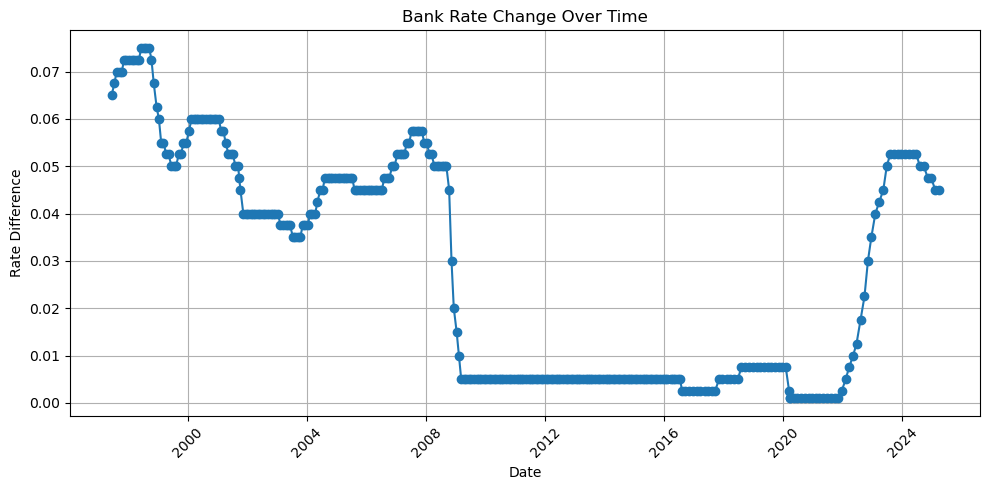

In [53]:
# Quick visual for voted rates
plt.figure(figsize=(10, 5))
plt.plot(mpc_bank_rates_voted['date'], mpc_bank_rates_voted['bank_rate'], marker='o', linestyle='-')
plt.title('Bank Rate Change Over Time')
plt.xlabel('Date')
plt.ylabel('Rate Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Check MPC members votes -> trying to determine wheather they are part of the popular vote or not -> more or less conservative

In [55]:
mpc_df_og_cleaned.head(15)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53
0,NaN,Current members,Andrew Bailey,Sarah Breeden,Swati Dhingra,Megan Greene,Clare Lombardelli,Catherine L Mann,Huw Pill,Dave Ramsden,...,Michael\nSaunders,Andrew Sentance,Nemat Shafik,Silvana Tenreyro,Paul Tucker,John Vickers,Gertjan\nVlieghe,Sushil Wadhwani,David Walton,Martin Weale
1,NaN,NaN,First vote:,First vote:,First vote:,First vote:,First vote:,First vote:,First vote:,First vote:,...,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:,Last vote:
2,None,None,19 Mar 20,2 Nov 23,22 Sep 22,3 Aug 23,1 Aug 24,23 Sep 21,23 Sep 21,14 Sep 17,...,4 Aug 22,5 May 11,2 Feb 17,22 June 23,9 Oct 13,7 Sep 00,5 Aug 21,9 May 02,8 Jun 06,4 Aug 16
3,Voted to increase,NaN,14,0,2,4,0,18,14,16,...,15,20,0,9,13,10,2,3,2,12
4,Voted to maintain,NaN,24,9,9,8,3,10,13,39,...,30,28,28,39,114,11,48,18,8,60
5,Voted to reduce,NaN,4,3,10,2,3,1,2,8,...,5,8,1,2,10,7,4,16,2,1
6,Meetings,NaN,42,12,21,14,6,29,29,63,...,50,56,29,50,137,28,54,37,12,73
7,NaN,Bank Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1997-06-06 00:00:00,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
mpc_member_votes = mpc_df_og_cleaned.drop(index=range(1, 9)).reset_index(drop=True)

# Get the name row (index 0) and fix the \n issue
name_row = mpc_member_votes.iloc[0, 2:].replace({r'\n': ' '}, regex=True)

# Split into given and family names
given_names = name_row.apply(lambda x: ' '.join(str(x).split()[:-1]).lower() if pd.notnull(x) else '')
family_names = name_row.apply(lambda x: str(x).split()[-1].lower() if pd.notnull(x) and len(str(x).split()) > 0 else '')

# Create the new rows
new_rows = pd.DataFrame([[""] * 2 + given_names.tolist(), [""] * 2 + family_names.tolist()],
                        columns=mpc_member_votes.columns)

# Insert the new rows after the name row
mpc_member_votes = pd.concat([
    mpc_member_votes.iloc[:1],
    new_rows,
    mpc_member_votes.iloc[1:]
]).reset_index(drop=True)

display(mpc_member_votes.head(15))

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53
0,NaN,Current members,Andrew Bailey,Sarah Breeden,Swati Dhingra,Megan Greene,Clare Lombardelli,Catherine L Mann,Huw Pill,Dave Ramsden,...,Michael\nSaunders,Andrew Sentance,Nemat Shafik,Silvana Tenreyro,Paul Tucker,John Vickers,Gertjan\nVlieghe,Sushil Wadhwani,David Walton,Martin Weale
1,,,andrew,sarah,swati,megan,clare,catherine l,huw,dave,...,michael,andrew,nemat,silvana,paul,john,gertjan,sushil,david,martin
2,,,bailey,breeden,dhingra,greene,lombardelli,mann,pill,ramsden,...,saunders,sentance,shafik,tenreyro,tucker,vickers,vlieghe,wadhwani,walton,weale
3,1997-06-06 00:00:00,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-07-10 00:00:00,0.0675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997-08-07 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997-09-11 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1997-10-09 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1997-11-06 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1997-12-04 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Cleanup, drop the first two rows
mpc_member_votes = mpc_member_votes.iloc[2:].reset_index(drop=True)

# Set the third row (which is now at index 0) as the header
new_header = mpc_member_votes.iloc[0]  # First row after dropping rows 0 and 1
mpc_member_votes.columns = new_header

# Drop the row now used as the header (index 0)
mpc_member_votes = mpc_member_votes.drop(0).reset_index(drop=True)

# Check the cleaned DataFrame
mpc_member_votes.head(15)

,,,bailey,breeden,dhingra,greene,lombardelli,mann,pill,ramsden,...,saunders,sentance,shafik,tenreyro,tucker,vickers,vlieghe,wadhwani,walton,weale
0,1997-06-06 00:00:00,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-07-10 00:00:00,0.0675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-08-07 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-09-11 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-10-09 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997-11-06 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997-12-04 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1998-01-08 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998-02-05 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998-03-05 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Manually assign the first two columns as 'vote_date' and 'bank_rate'
mpc_member_votes.columns = ['vote_date', 'bank_rate'] + list(mpc_member_votes.columns[2:])

mpc_member_votes.head(15)

,vote_date,bank_rate,bailey,breeden,dhingra,greene,lombardelli,mann,pill,ramsden,...,saunders,sentance,shafik,tenreyro,tucker,vickers,vlieghe,wadhwani,walton,weale
0,1997-06-06 00:00:00,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-07-10 00:00:00,0.0675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-08-07 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-09-11 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-10-09 00:00:00,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997-11-06 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997-12-04 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1998-01-08 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998-02-05 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998-03-05 00:00:00,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Convert 'vote_date' to datetime format (ensuring it's in the correct format)
mpc_member_votes['vote_date'] = pd.to_datetime(mpc_member_votes['vote_date'], errors='coerce')

# Check if any conversion failed
if mpc_member_votes['vote_date'].isnull().any():
    print("There were errors in converting 'vote_date' to datetime.")

# Create 'vote_year' and 'vote_month' columns
mpc_member_votes['vote_year'] = mpc_member_votes['vote_date'].dt.year
mpc_member_votes['vote_month'] = mpc_member_votes['vote_date'].dt.month


mpc_member_votes.head()

,vote_date,bank_rate,bailey,breeden,dhingra,greene,lombardelli,mann,pill,ramsden,...,shafik,tenreyro,tucker,vickers,vlieghe,wadhwani,walton,weale,vote_year,vote_month
0,1997-06-06,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,6
1,1997-07-10,0.0675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,7
2,1997-08-07,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,8
3,1997-09-11,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,9
4,1997-10-09,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,10


In [60]:
# New column with the previous month's bank_rate
mpc_member_votes['previous_bank_rate'] = mpc_member_votes['bank_rate'].shift(1)

# Columns to process
exclude_columns = ['vote_date', 'bank_rate', 'previous_bank_rate', 'vote_year', 'vote_month']
columns_to_process = [col for col in mpc_member_votes.columns if col not in exclude_columns and not col.endswith('_vote')]

# Compare voted rate against the previous bank rate
def calculate_difference(row, column):
    previous_rate = row['previous_bank_rate']
    value = row[column]
    
    if pd.isna(value) or pd.isna(previous_rate):
        return np.nan
    elif value == "Increase":
        return "increase"
    elif value == "Decrease":
        return "reduce"
    else:
        try:
            difference = float(value) - previous_rate  # <-- NOTE: flipped direction!
            
            if difference == 0:
                return "maintain"
            elif difference > 0:
                return "increase"
            else:
                return "reduce"
        except ValueError:
            return value

# Apply the corrected logic
for column in columns_to_process:
    mpc_member_votes[column + '_vote'] = mpc_member_votes.apply(lambda row: calculate_difference(row, column), axis=1)

mpc_member_votes.head(20)

,vote_date,bank_rate,bailey,breeden,dhingra,greene,lombardelli,mann,pill,ramsden,...,saunders_vote,sentance_vote,shafik_vote,tenreyro_vote,tucker_vote,vickers_vote,vlieghe_vote,wadhwani_vote,walton_vote,weale_vote
0,1997-06-06,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-07-10,0.0675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-08-07,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-09-11,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-10-09,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997-11-06,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997-12-04,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1998-01-08,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998-02-05,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998-03-05,0.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Assuming the new columns have been added to the DataFrame (with '_difference' suffix)
aggregated_votes = {}

# Iterate over each new difference column (e.g., bailey_difference, breeden_difference, ...)
for column in columns_to_process:
    # Count the occurrences of each type of vote for the current member (column)
    vote_counts = mpc_member_votes[column + '_vote'].value_counts()
    
    # Store the result in the dictionary, with the column name as the key
    aggregated_votes[column] = vote_counts

# Convert the dictionary of aggregated votes into a DataFrame for better readability
aggregated_votes_df = pd.DataFrame(aggregated_votes)

# Display the aggregated vote counts
aggregated_votes_df

,bailey,breeden,dhingra,greene,lombardelli,mann,pill,ramsden,taylor,members,...,saunders,sentance,shafik,tenreyro,tucker,vickers,vlieghe,wadhwani,walton,weale
increase,14,NaN,2,4,NaN,18,14,16,NaN,NaN,...,15,20,NaN,9,13,10,2,3,2,12
maintain,24,9.0,9,8,3.0,10,13,39,2.0,NaN,...,30,28,28.0,39,114,11,48,18,8,60
reduce,4,3.0,10,2,3.0,1,2,8,3.0,NaN,...,5,8,1.0,2,10,7,4,16,2,1


In [62]:
# Select only the vote direction columns ('_vote')
vote_columns = [col for col in mpc_member_votes.columns if col.endswith('_vote')]

# Melt just those columns to long format
votes_long = mpc_member_votes.melt(
    id_vars=['vote_date', 'bank_rate'],
    value_vars=vote_columns,
    var_name='author',
    value_name='vote'
)

# Drop rows where vote is missing
votes_long = votes_long.dropna(subset=['vote'])

# Extract year and month from vote_date
votes_long['vote_date'] = pd.to_datetime(votes_long['vote_date'])
votes_long['year'] = votes_long['vote_date'].dt.year
votes_long['month'] = votes_long['vote_date'].dt.month

# Remove the '_vote' suffix from author names
votes_long['author'] = votes_long['author'].str.replace('_vote', '', regex=False)

# Keep only relevant columns
votes_tidy = votes_long[['author', 'year', 'month', 'vote']].reset_index(drop=True)

votes_tidy.head(15)

,author,year,month,vote
0,bailey,2020,3,reduce
1,bailey,2020,3,maintain
2,bailey,2020,5,maintain
3,bailey,2020,6,maintain
4,bailey,2020,8,maintain
5,bailey,2020,9,maintain
6,bailey,2020,11,maintain
7,bailey,2020,12,maintain
8,bailey,2021,2,maintain
9,bailey,2021,3,maintain


In [128]:
# Bring in status
votes_with_status = votes_tidy.merge(
    mpc_member_vote_clean[['family_name', 'status']],
    how='left',
    left_on='author',
    right_on='family_name'
)

# Drop the redundant family name and reorder columns
votes_with_status.drop(columns='family_name', inplace=True)
votes_with_status = votes_with_status[['author', 'status', 'year', 'month', 'vote']]

votes_with_status.head(15)

,author,status,year,month,vote
0,bailey,current,2020,3,reduce
1,bailey,current,2020,3,maintain
2,bailey,current,2020,5,maintain
3,bailey,current,2020,6,maintain
4,bailey,current,2020,8,maintain
5,bailey,current,2020,9,maintain
6,bailey,current,2020,11,maintain
7,bailey,current,2020,12,maintain
8,bailey,current,2021,2,maintain
9,bailey,current,2021,3,maintain


In [132]:
# Save to Excel
votes_with_status.to_excel('MPC_votes_by_author.xlsx', index=False)

## Check member speaches and their content

In [65]:
# UK speeches
uk_speeches_df.copy().reset_index(drop=True)

,reference,country,date,title,author,is_gov,text,year_month,year,month,speech_length,cleaned_text
0,r980915a_BOE,united kingdom,1998-09-15,Speech,george,1,"Thank you, Chairman. I'm actually very pleased...",1998-09,1998,9,2387,thank you chairman im actually very pleased to...
1,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,1,It's a great pleasure to be here in the beauti...,1998-10,1998,10,4045,its a great pleasure to be here in the beautif...
2,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,Few industries have suffered more from volatil...,1998-10,1998,10,2311,few industries have suffered more from volatil...
3,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,My topic this evening is the use of forecasts ...,1998-11,1998,11,4690,my topic this evening is the use of forecasts ...
4,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,"Six years ago this week, sterling left the exc...",1998-11,1998,11,4452,six years ago this week sterling left the exch...
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,united kingdom,2022-10-07,"Shocks, inflation, and the policy response",ramsden,0,Thank you very much for the invitation to spea...,2022-10,2022,10,4161,thank you very much for the invitation to spea...
1205,r221012a_BOE,united kingdom,2022-10-12,Monetary policy: an anchor in challenging times,pill,0,Huw Pill talks about how we will bring inflati...,2022-10,2022,10,3567,huw pill talks about how we will bring inflati...
1206,r221015a_BOE,united kingdom,2022-10-15,Monetary policy and financial stability interv...,bailey,1,We are meeting in the most difficult of times....,2022-10,2022,10,1767,we are meeting in the most difficult of times ...
1207,r221019a_BOE,united kingdom,2022-10-19,"Governance of “Decentralised” Finance: Get up,...",wilkins,0,"These are divided into seven categories, suffr...",2022-10,2022,10,5382,these are divided into seven categories suffra...


In [66]:
cols_to_keep = ['reference', 'author', 'is_gov', 'year', 'month', 'speech_length', 'cleaned_text']
uk_speeches_cleaned = uk_speeches_df[cols_to_keep].copy()
uk_speeches_cleaned.head(15)

,reference,author,is_gov,year,month,speech_length,cleaned_text
4961,r980915a_BOE,george,1,1998,9,2387,thank you chairman im actually very pleased to...
4962,r981021b_BOE,george,1,1998,10,4045,its a great pleasure to be here in the beautif...
4963,r981021a_BOE,king,1,1998,10,2311,few industries have suffered more from volatil...
4964,r981101a_BOE,budd,0,1998,11,4690,my topic this evening is the use of forecasts ...
4965,r981101b_BOE,vickers,0,1998,11,4452,six years ago this week sterling left the exch...
4966,r981119a_BOE,george,1,1998,11,2363,let me put some of the recent newspaper headli...
4967,r981201a_BOE,governor,0,1998,12,6144,it is both an honour and a challenge to delive...
4968,r981215a_BOE,buiter,0,1998,12,4574,economic and monetary union has arrived de fac...
4969,r990112a_BOE,george,1,1999,1,2550,i am only too well aware of the pressure curre...
4970,r990118a_BOE,george,1,1999,1,2434,it would be a masterly understatement to descr...


In [67]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')  # For pos_tag
nltk.download('stopwords')                   # If not already
nltk.download('omw-1.4')                     # Optional, for lemmatizer context

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rebo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rebo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rebo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rebo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rebo\AppData\Roaming\nltk_d

True

In [68]:
# Preprocessing function
def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions i.e I'm not good goes to I am not good
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub('#', '', text)         # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    #Below is to create a set of stop words from the NLTK library's predefined list but not is excluded.
    stop_words = set(stopwords.words('english')) - {'not'} 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


# Define the tag map for POS tagging.
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Lemmatise the tokens with correct POS tags.
lemma_function = WordNetLemmatizer()

# Lemmatisation function.
def lemmatize_tokens(tokens):
    #For each word in the token list, it lemmatizes the word with the correct part-of-speech
    lemmatized_tokens = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]
    return lemmatized_tokens

In [69]:
# Apply the cleaning function
uk_speeches_cleaned['text_tokenised'] = uk_speeches_cleaned['cleaned_text'].apply(word_tokenize)

# Review the result.
uk_speeches_cleaned.head()

,reference,author,is_gov,year,month,speech_length,cleaned_text,text_tokenised
4961,r980915a_BOE,george,1,1998,9,2387,thank you chairman im actually very pleased to...,"[thank, you, chairman, im, actually, very, ple..."
4962,r981021b_BOE,george,1,1998,10,4045,its a great pleasure to be here in the beautif...,"[its, a, great, pleasure, to, be, here, in, th..."
4963,r981021a_BOE,king,1,1998,10,2311,few industries have suffered more from volatil...,"[few, industries, have, suffered, more, from, ..."
4964,r981101a_BOE,budd,0,1998,11,4690,my topic this evening is the use of forecasts ...,"[my, topic, this, evening, is, the, use, of, f..."
4965,r981101b_BOE,vickers,0,1998,11,4452,six years ago this week sterling left the exch...,"[six, years, ago, this, week, sterling, left, ..."


In [70]:
# Apply the cleaning function
uk_speeches_cleaned['text_lemmatised'] = uk_speeches_cleaned['text_tokenised'].apply(lemmatize_tokens)

# Review the result.
uk_speeches_cleaned.head()

,reference,author,is_gov,year,month,speech_length,cleaned_text,text_tokenised,text_lemmatised
4961,r980915a_BOE,george,1,1998,9,2387,thank you chairman im actually very pleased to...,"[thank, you, chairman, im, actually, very, ple...","[thank, you, chairman, im, actually, very, ple..."
4962,r981021b_BOE,george,1,1998,10,4045,its a great pleasure to be here in the beautif...,"[its, a, great, pleasure, to, be, here, in, th...","[it, a, great, pleasure, to, be, here, in, the..."
4963,r981021a_BOE,king,1,1998,10,2311,few industries have suffered more from volatil...,"[few, industries, have, suffered, more, from, ...","[few, industry, have, suffer, more, from, vola..."
4964,r981101a_BOE,budd,0,1998,11,4690,my topic this evening is the use of forecasts ...,"[my, topic, this, evening, is, the, use, of, f...","[my, topic, this, evening, be, the, use, of, f..."
4965,r981101b_BOE,vickers,0,1998,11,4452,six years ago this week sterling left the exch...,"[six, years, ago, this, week, sterling, left, ...","[six, year, ago, this, week, sterling, leave, ..."
